# 機械学習ハンズオン　練習問題1：アヤメ分類

[UCIのirisデータセット](https://archive.ics.uci.edu/ml/datasets/Iris)を使って、アヤメの分類をしましょう。

アヤメの種類は次の3つに分類されます。
 * Iris-setosa
 * Iris-versicolor
 * Iris-virginica


【課題】

 1. 何種類かのモデルを作って学習させてください。
    * 単層パーセプトロンモデル
    * 多層パーセプトロン(MLP)モデル
      * 層数やノード数をいろいろ変更して試してみてください。
    * その他
 1. エポックごとの損失、正答率をグラフで可視化してください。
 1. 学習率をいろいろ変更して試してください。
    * ヒント： `Model.compile()` に渡す `optimizer` 引数を変更します。

In [0]:
# ここで必要なimportを行ってください。
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [0]:
# データセットファイルのURL
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

## ファイルの読み込み

In [0]:
headers = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class')
df = pd.read_csv(dataset_url, sep=',', names=headers)

In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## データの分析

### クラスごとのデータ数

In [5]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### 特徴の相関関係

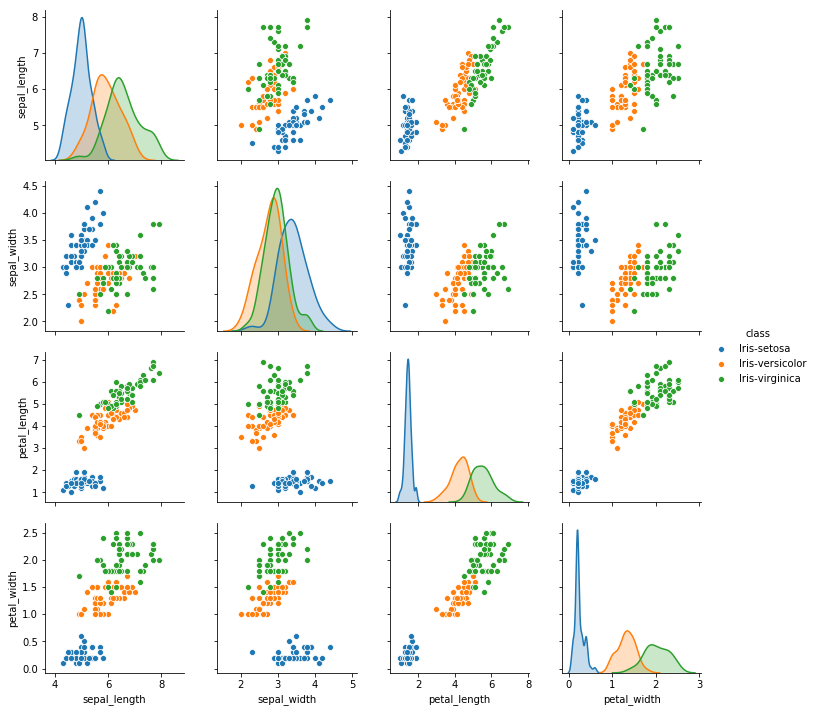

In [6]:
sns.pairplot(df, hue='class')

## 学習データの作成

### 特徴量とラベルの作成

In [0]:
ys = df['class'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
xs = df.drop(['class'], axis=1)

### 特徴量の正規化

In [0]:
all_xs = xs.values
all_ys = ys.values
all_xs = StandardScaler().fit_transform(all_xs)

### 訓練データとテストデータの分割

In [9]:
train_xs, test_xs, train_ys, test_ys = train_test_split(all_xs, all_ys, test_size=0.3)
print(train_xs.shape, train_ys.shape, test_xs.shape, test_ys.shape)

(105, 4) (105,) (45, 4) (45,)


## モデルの構築

単層か多層かいずれかのモデルを選択する。

### 単層パーセプトロンモデル

In [10]:
model_slp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, input_dim=train_xs.shape[1], activation='softmax')
])

W0722 15:04:06.293556 139832041023360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 多層パーセプトロンモデル

In [0]:
model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=train_xs.shape[1], activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model = model_mlp

## モデルのコンパイル

勾配法はSGDを使っているが、Adamなどの別のアルゴリズムに切り替えてもよい。

In [13]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


## 学習の実行

In [14]:
num_epochs = 1000
hist = model.fit(train_xs, train_ys, epochs=num_epochs, validation_data=(test_xs, test_ys))

Train on 105 samples, validate on 45 samples
Epoch 1/1000
105/105 [==============================] - 0s 3ms/sample - loss: 1.0997 - acc: 0.2857 - val_loss: 1.1083 - val_acc: 0.3111
Epoch 2/1000
105/105 [==============================] - 0s 236us/sample - loss: 1.0991 - acc: 0.2571 - val_loss: 1.1082 - val_acc: 0.0889
Epoch 3/1000
105/105 [==============================] - 0s 284us/sample - loss: 1.0985 - acc: 0.2190 - val_loss: 1.1081 - val_acc: 0.0889
Epoch 4/1000
105/105 [==============================] - 0s 231us/sample - loss: 1.0979 - acc: 0.2095 - val_loss: 1.1084 - val_acc: 0.0889
Epoch 5/1000
105/105 [==============================] - 0s 239us/sample - loss: 1.0971 - acc: 0.2000 - val_loss: 1.1085 - val_acc: 0.0889
Epoch 6/1000
105/105 [==============================] - 0s 223us/sample - loss: 1.0965 - acc: 0.2000 - val_loss: 1.1085 - val_acc: 0.0889
Epoch 7/1000
105/105 [==============================] - 0s 250us/sample - loss: 1.0960 - acc: 0.2000 - val_loss: 1.1083 - val_acc

## 評価

### 損失・正答率

Text(0, 0.5, 'accuracy')

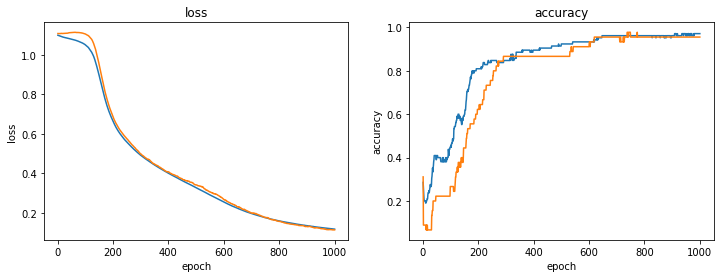

In [15]:
%matplotlib inline
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), hist.history["loss"])
plt.plot(range(1, num_epochs+1), hist.history["val_loss"])
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), hist.history["acc"])
plt.plot(range(1, num_epochs+1), hist.history["val_acc"])
plt.title("accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")